```
This software is part of GPU Ocean. 

Copyright (C) 2024 SINTEF Digital

Minimalistic example for running the simplified ocean model nested
within the forecast produced by an operational 3D ocean model.

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
```

# Minimal realistic simulation

This is the most compact way to quickly run the simplified ocean model on a subdomain of the NorKyst-800 operational model.
We use utility functions for initialization, simulation and animation/plotting.

For more details, see the other examples.

In [4]:
# Load required modules
%matplotlib inline

from IPython.display import display

#For plotting
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.rcParams["animation.html"] = "jshtml"
mpl.rcParams['figure.facecolor'] = 'white'

# Import relevant modules from within GPU Ocean
from gpuocean.SWEsimulators import GPUOceanSim
from gpuocean.utils import IPythonMagic, NetCDFInitialization, PlotHelper

In [5]:
# Create the GPU context
%cuda_context_handler gpu_ctx

This will give inaccurate angle along the border!
This will give inaccurate coriolis along the border!


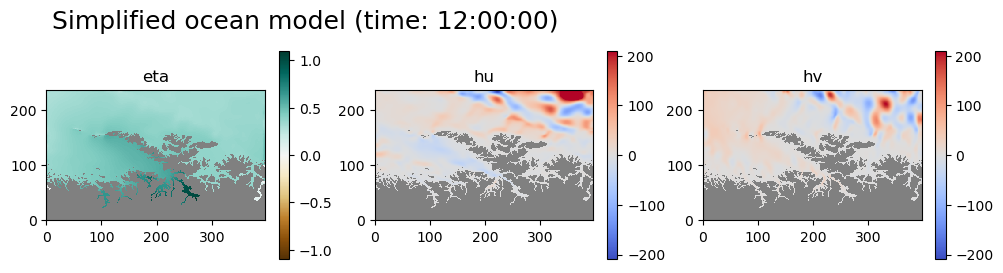

In [6]:
# Url or path to operational ocean forecast
source_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'

# Use a predefined subdomain
casename = 'lofoten'

# Load initial and boundary conditions, bathymetry, landmask, forcing, etc
sim_args = NetCDFInitialization.getInitialConditionsNorKystCases(source_url, casename)

# Create simulation object
sim = GPUOceanSim.GPUOceanSim(gpu_ctx, **NetCDFInitialization.removeMetadata(sim_args))

# Option 1: 
# Run simulation directly and plot the solution only
sim.step(12*3600)
_, _ = PlotHelper.plotSim(sim, plot_title="Simplified ocean model")

# # Option 2:
# # Run and make animation / plot of solution for 12 hours using a utility function
# PlotHelper.simAnimation(sim, 12*3600, 1800, plot_title="Simplified ocean model")

